In [1]:
import os
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch

In [2]:
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn/'

# Testing some datasets

In [16]:
_train_datafile = 'clean_reconstruction_training_set'
dset_kwargs = {'cgram_shuffle':2}
from data.ReconstructionTrainingDataset import CleanSoundsDataset
SoundsDataset = CleanSoundsDataset
train_datafile = f'{engram_dir}{_train_datafile}.hdf5'
train_dataset = SoundsDataset(train_datafile, subset=.9, **dset_kwargs)

In [31]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=False)

In [32]:
train_features, train_labels = next(iter(train_loader))

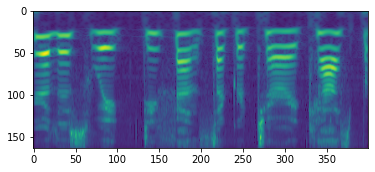

In [29]:
plt.figure() # CGRAM SHUFFLE = 0
plt.imshow(train_features[0,0])

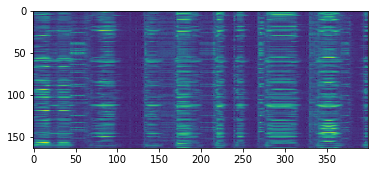

In [25]:
plt.figure() # CGRAM SHUFFLE = 1 # freq shuffle
plt.imshow(train_features[0,0])

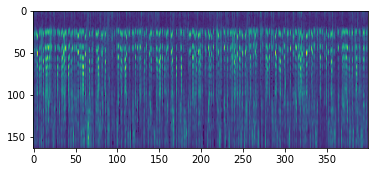

In [33]:
plt.figure() # CGRAM SHUFFLE = 2 # temporal shuffle
plt.imshow(train_features[0,0])

# Reconstruction Training

In [3]:
def smooth(xs, ys, n=3):
    return np.convolve(ys, np.ones(n)/n, mode='same')

In [4]:
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn/'

In [5]:
tensorboard_dir = f'{engram_dir}1_tensorboard/'

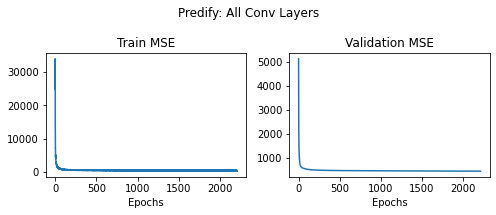

In [6]:
tfdir = tensorboard_dir + 'pnet/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    train_loss.extend([e.value for e in ea.Scalars('MSE Train/Sum')])
    eval_loss.extend([e.value for e in ea.Scalars('MSE Eval/Sum')])
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
smoothed_train = smooth(
    np.linspace(0, len(eval_loss), len(train_loss)), train_loss, n=15)
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), smoothed_train)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(0, 1500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

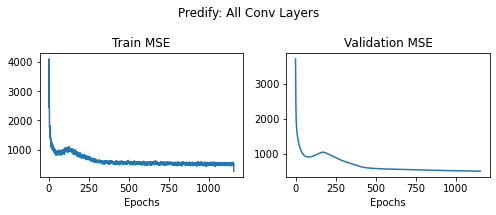

In [9]:
tfdir = tensorboard_dir + 'pnet3/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    train_loss.extend([e.value for e in ea.Scalars('MSE Train/Sum')])
    eval_loss.extend([e.value for e in ea.Scalars('MSE Eval/Sum')])
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
smoothed_train = smooth(
    np.linspace(0, len(eval_loss), len(train_loss)), train_loss, n=15)
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), smoothed_train)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(0, 1500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

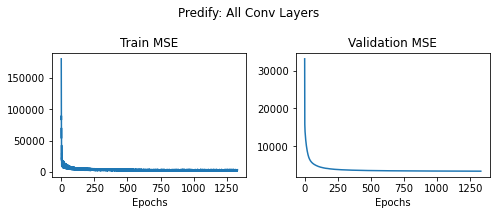

In [7]:
tfdir = tensorboard_dir + 'pnet_temp_shuffle2/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    train_loss.extend([e.value for e in ea.Scalars('MSE Train/Sum')])
    eval_loss.extend([e.value for e in ea.Scalars('MSE Eval/Sum')])
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), train_loss)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(3000, 3500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

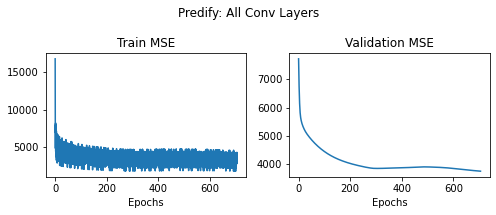

In [8]:
tfdir = tensorboard_dir + 'pnet_temp_shuffle3/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    train_loss.extend([e.value for e in ea.Scalars('MSE Train/Sum')])
    eval_loss.extend([e.value for e in ea.Scalars('MSE Eval/Sum')])
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), train_loss)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(3000, 3500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

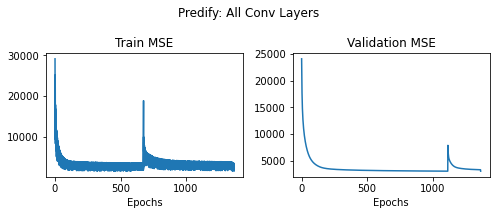

In [10]:
tfdir = tensorboard_dir + 'pnet_freq_shuffle2/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    train_loss.extend([e.value for e in ea.Scalars('MSE Train/Sum')])
    eval_loss.extend([e.value for e in ea.Scalars('MSE Eval/Sum')])
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), train_loss)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(3000, 3500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

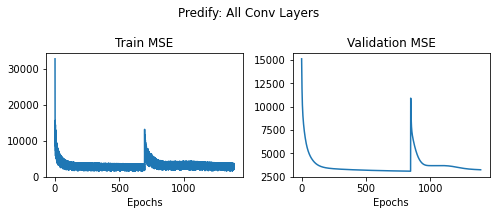

In [11]:
tfdir = tensorboard_dir + 'pnet_freq_shuffle3/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    train_loss.extend([e.value for e in ea.Scalars('MSE Train/Sum')])
    eval_loss.extend([e.value for e in ea.Scalars('MSE Eval/Sum')])
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), train_loss)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(3000, 3500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

In [ ]:
tfdir = tensorboard_dir + 'pnet_rnn_0/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    losses = [e.value for e in ea.Scalars('TrainingLoss/CE')]
    train_loss.extend(losses)
    for epoch in range(len(losses)):
        eval_loss.append(0)
        #eval_loss.append(ea.Scalars(f'EvalPerf/Epoch#{epoch}')[0].value)
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))
train_loss = smooth(len(train_loss), train_loss, 50)
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), train_loss)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(3000, 3500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

# Hyperparameter Training

In [6]:
plot_ci = True

In [8]:
tensorboard_dir = f'{engram_dir}2_hyperp/pnet/'

hyper_Babble8Spkr_snr-6.0
events.out.tfevents.1680709843.ax05.rc.zi.columbia.edu.28109.0
0.8821704387664795
191
events.out.tfevents.1680704488.ax16.rc.zi.columbia.edu.2517.0
0.8022943735122681
24


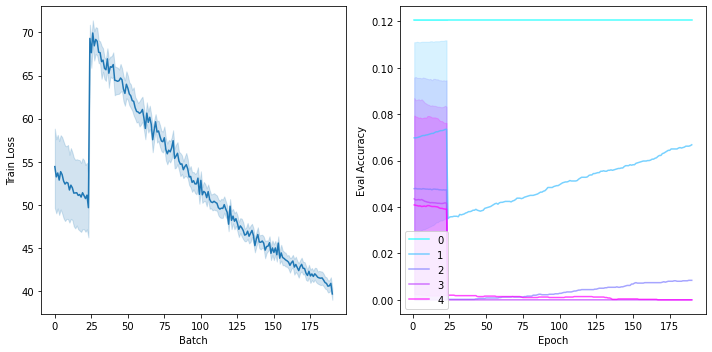




hyper_pinkNoise_snr3.0
events.out.tfevents.1680711800.ax02.rc.zi.columbia.edu.99096.0
0.26282069087028503
36
events.out.tfevents.1680766137.ax14.rc.zi.columbia.edu.5171.1
0.6824467182159424
201
events.out.tfevents.1680808241.ax14.rc.zi.columbia.edu.5171.2
0.15554577112197876
7
events.out.tfevents.1680724011.ax14.rc.zi.columbia.edu.5171.0
0.8344401717185974
201
events.out.tfevents.1680704847.ax14.rc.zi.columbia.edu.14611.0
0.26769953966140747
23


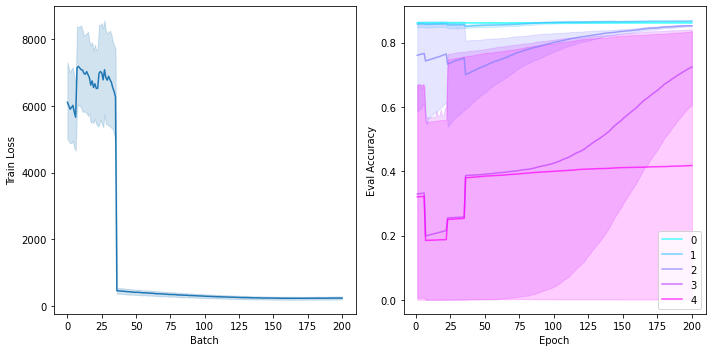




hyper_pinkNoise_snr-6.0
events.out.tfevents.1680711635.ax14.rc.zi.columbia.edu.36508.0
0.1715274453163147
22
events.out.tfevents.1680723878.ax08.rc.zi.columbia.edu.14198.0
0.14397573471069336
164
events.out.tfevents.1680704739.ax16.rc.zi.columbia.edu.8580.0
0.32025641202926636
23


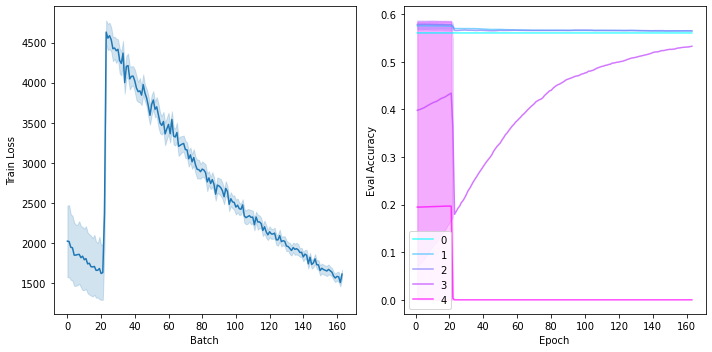




hyper_AudScene_snr-3.0
events.out.tfevents.1680702962.ax08.rc.zi.columbia.edu.151902.0
0.48270198702812195
201
events.out.tfevents.1680807670.ax08.rc.zi.columbia.edu.151902.1
0.8215493559837341
4


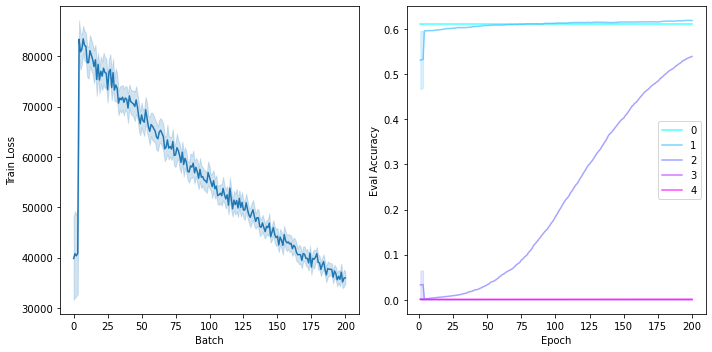




hyper_AudScene_snr0.0
events.out.tfevents.1680704482.ax08.rc.zi.columbia.edu.14024.0
0.7996497750282288
201
events.out.tfevents.1680809101.ax08.rc.zi.columbia.edu.14024.1
0.650452733039856
1


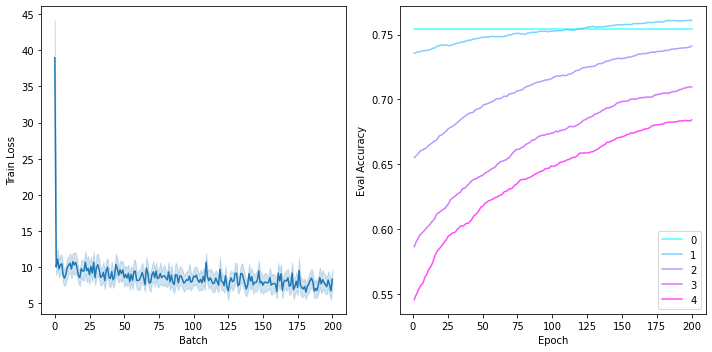




hyper_pinkNoise_snr-9.0
events.out.tfevents.1680704739.ax16.rc.zi.columbia.edu.8581.0
0.9314166307449341
23
events.out.tfevents.1680711627.ax08.rc.zi.columbia.edu.132794.0
0.6416088342666626
189


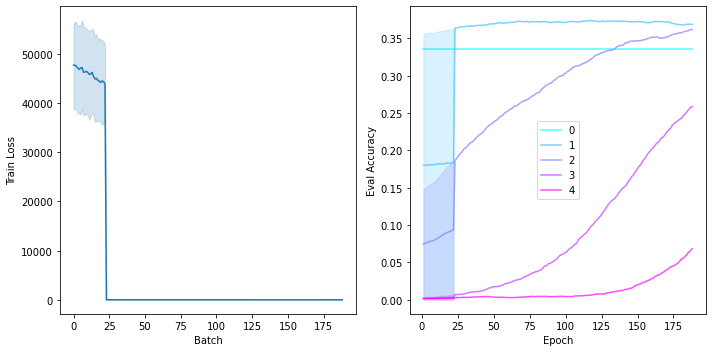




hyper_pinkNoise_snr0.0
events.out.tfevents.1680745349.ax16.rc.zi.columbia.edu.62529.0
0.7491829991340637
201
events.out.tfevents.1680724004.ax02.rc.zi.columbia.edu.132577.0
0.6664756536483765
62
events.out.tfevents.1680704815.ax14.rc.zi.columbia.edu.13993.0
0.07843125611543655
23
events.out.tfevents.1680787148.ax16.rc.zi.columbia.edu.62529.1
0.8501240015029907
109
events.out.tfevents.1680711680.ax02.rc.zi.columbia.edu.94865.0
0.36374905705451965
36


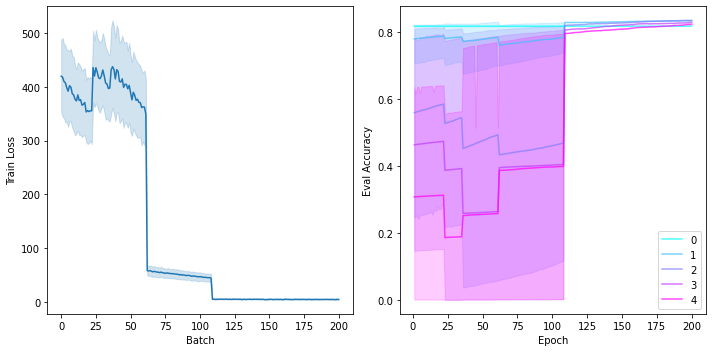




hyper_AudScene_snr-6.0
events.out.tfevents.1680745838.ax13.rc.zi.columbia.edu.77046.1
0.27091068029403687
201
events.out.tfevents.1680703982.ax13.rc.zi.columbia.edu.77046.0
0.11263656616210938
201
events.out.tfevents.1680787673.ax13.rc.zi.columbia.edu.77046.2
0.11198247969150543
106
events.out.tfevents.1680702962.ax14.rc.zi.columbia.edu.41671.0
0.5442363619804382
1


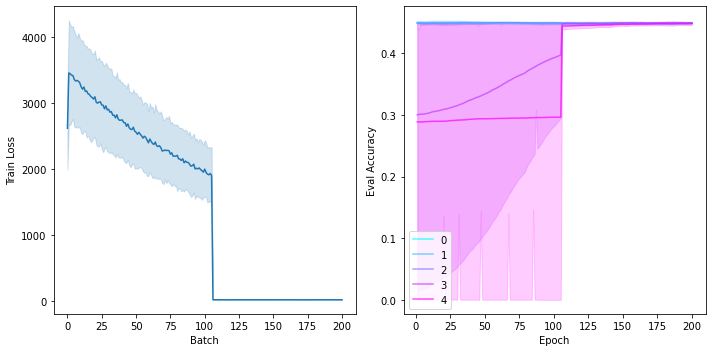




hyper_Babble8Spkr_snr-3.0
events.out.tfevents.1680704591.ax16.rc.zi.columbia.edu.3753.0
0.7851470708847046
24
events.out.tfevents.1680808659.ax14.rc.zi.columbia.edu.26025.2
0.9196122288703918
6
events.out.tfevents.1680710298.ax01.rc.zi.columbia.edu.248009.0
0.20377549529075623
40
events.out.tfevents.1680723995.ax02.rc.zi.columbia.edu.132171.0
0.3061743378639221
1
events.out.tfevents.1680724470.ax14.rc.zi.columbia.edu.26025.0
0.6687909960746765
201
events.out.tfevents.1680766555.ax14.rc.zi.columbia.edu.26025.1
0.3333435654640198
201


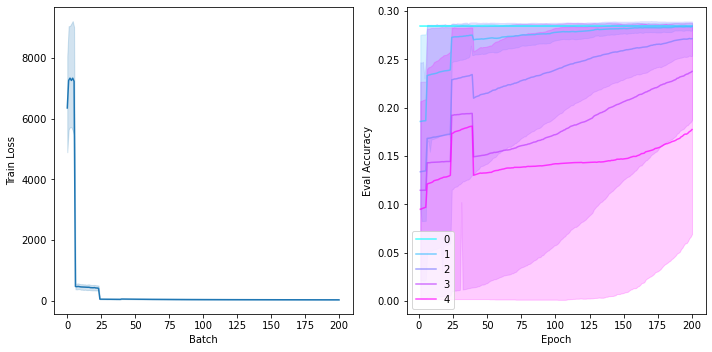




hyper_AudScene_snr3.0
events.out.tfevents.1680709843.ax05.rc.zi.columbia.edu.28022.0
0.0010930452262982726
190
events.out.tfevents.1680704483.ax16.rc.zi.columbia.edu.2150.0
0.3126447796821594
24


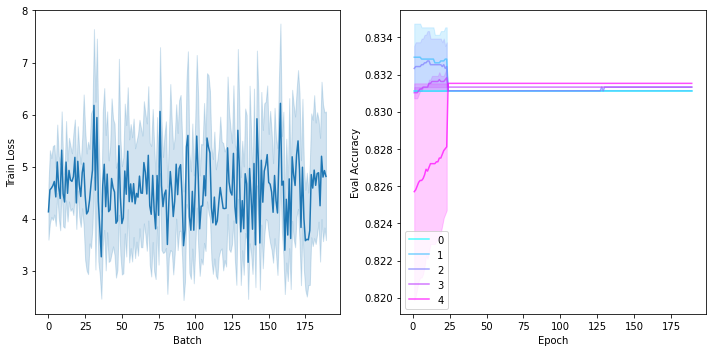




hyper_AudScene_snr-9.0
events.out.tfevents.1680733369.ax08.rc.zi.columbia.edu.19336.0
0.20708583295345306
145
events.out.tfevents.1680699316.ax08.rc.zi.columbia.edu.74300.0
0.6811441779136658
64


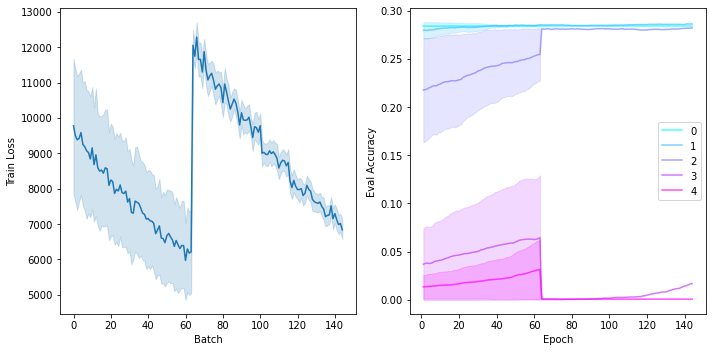




hyper_Babble8Spkr_snr3.0
events.out.tfevents.1680766555.ax14.rc.zi.columbia.edu.26042.1
0.9888260960578918
201
events.out.tfevents.1680723995.ax02.rc.zi.columbia.edu.132395.0
0.32186782360076904
1
events.out.tfevents.1680724470.ax14.rc.zi.columbia.edu.26042.0
0.5168225169181824
201
events.out.tfevents.1680704739.ax16.rc.zi.columbia.edu.8381.0
0.8811967968940735
23
events.out.tfevents.1680711627.ax01.rc.zi.columbia.edu.272893.0
0.018136288970708847
35
events.out.tfevents.1680808659.ax14.rc.zi.columbia.edu.26042.2
0.04520725831389427
6


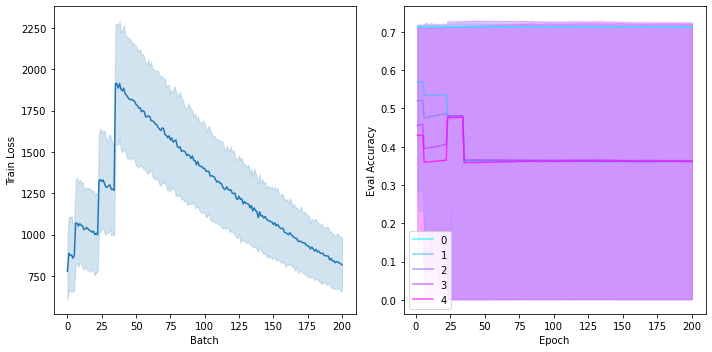




hyper_Babble8Spkr_snr-9.0
events.out.tfevents.1680704483.ax16.rc.zi.columbia.edu.2112.0
0.8426059484481812
24
events.out.tfevents.1680709843.ax05.rc.zi.columbia.edu.28075.0
0.4995849132537842
192


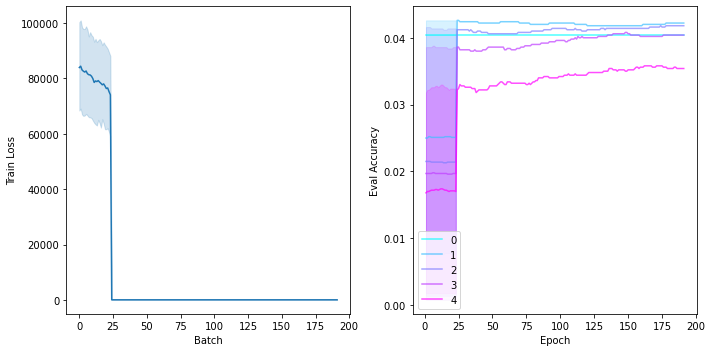




hyper_Babble8Spkr_snr0.0
events.out.tfevents.1680808659.ax14.rc.zi.columbia.edu.26043.2
0.8449652791023254
6
events.out.tfevents.1680710291.ax02.rc.zi.columbia.edu.41790.0
0.39078962802886963
40
events.out.tfevents.1680724470.ax14.rc.zi.columbia.edu.26043.0
0.8914780616760254
201
events.out.tfevents.1680723995.ax02.rc.zi.columbia.edu.132396.0
0.6520892381668091
1
events.out.tfevents.1680766556.ax14.rc.zi.columbia.edu.26043.1
0.7234562635421753
201
events.out.tfevents.1680704739.ax16.rc.zi.columbia.edu.8383.0
0.25953391194343567
23


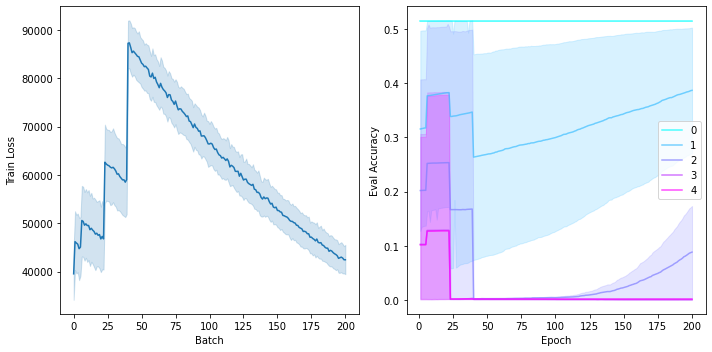




hyper_pinkNoise_snr-3.0
events.out.tfevents.1680711640.ax14.rc.zi.columbia.edu.36774.0
0.13588117063045502
22
events.out.tfevents.1680723878.ax08.rc.zi.columbia.edu.14266.0
0.08689169585704803
165
events.out.tfevents.1680704766.ax14.rc.zi.columbia.edu.12900.0
0.1887853443622589
23


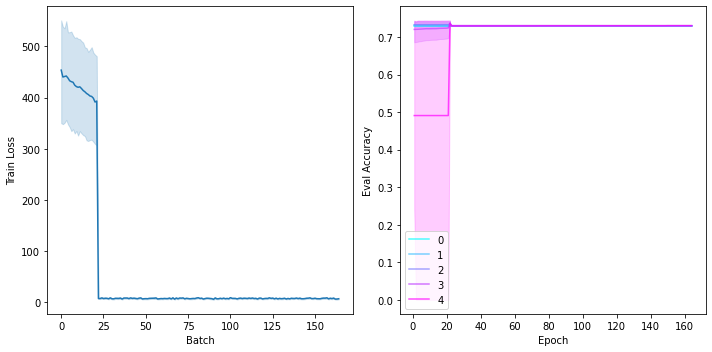

In [13]:
for tfdir in os.listdir(tensorboard_dir):
    if 'hyper' not in tfdir: continue
    print("====================")
    print(tfdir)
    print("====================")
    
    # Collect tensorboard files of interest
    tfdir = tensorboard_dir + tfdir + '/'
    tfdir_files = os.listdir(tfdir)
    if not plot_ci:
        if len(tfdir_files) > 1:
            print('More than one TF file; check it is correct.')
        tfdir_files = [tfdir_files[0]]
        
    # Collect losses
    train_loss = []
    train_batch = []
    eval_loss = []
    eval_epoch = []
    eval_timestep = []
    for tfdir_file in tfdir_files:
        tf_file = tfdir + tfdir_file
        ea = event_accumulator.EventAccumulator(tf_file)
        ea.Reload()
        print(tfdir_file)
        try:
            _train_loss = [e.value for e in ea.Scalars('TrainingLoss/CE')]
        except:
            continue
        _feedforward = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{1}_feedforward")]
        if np.isnan(_feedforward[-1]): continue
        print(_feedforward[-1])
        epoch = 1
        while True:
            try:
                for timestep in range(5):
                    eval_loss.append(ea.Scalars(f'NoisyPerf/Epoch#{epoch}')[timestep].value)
                    eval_epoch.append(epoch)
                    eval_timestep.append(timestep)
                epoch += 1
            except:
                break
        print(epoch)
        divisor = len(_train_loss)/epoch
        train_loss.extend(_train_loss)
        train_batch.extend([b//divisor for b in range(len(_train_loss))])

    # Make pandas dataframe
    train_df = pd.DataFrame({
        'Train Loss': train_loss,
        'Batch': train_batch
        })
    eval_df = pd.DataFrame({
        'Eval Accuracy': eval_loss,
        'Epoch': eval_epoch,
        'Timestep': eval_timestep 
        })
                
    fig, axs = plt.subplots(1, 2, figsize = (10,5))
    sns.lineplot(x='Batch', y='Train Loss', ax=axs[0], data=train_df)
    colors = plt.cm.cool(np.linspace(0,1,5))
    for timestep in range(5):
        sns.lineplot(
            x='Epoch', y='Eval Accuracy',
            ax=axs[1],
            data=eval_df[eval_df['Timestep']==timestep],
            color=colors[timestep], label=timestep,
            alpha=0.7
            )
    plt.tight_layout()
    plt.show()
    print('\n\n')

In [11]:
len(_train_loss)

1219

In [7]:
divisor

52.73684210526316

In [8]:
16*4

64

In [10]:
500/16

31.25